<a href="https://colab.research.google.com/github/dhruvpratapsingh/AI-for-Stocks/blob/master/Stock-Price-Prediction-Using-LSTM-DeepLearning/Predict_Stock_Price_LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

### Predict Stock Market Trend

In [0]:
# Prepare evironment from requirements.txt

## 1. Get Data

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22411 sha256=b732bd18dc64b6e2d515bc07d5f81fcb1171fc4dc964ce57aee5a5ea1c521378
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import yfinance as yf

# ticker = yf.Ticker("^DJI") # Dow Jones
ticker = yf.Ticker("^GSPC") #SNP
# ticker = yf.Ticker("^IXIC")
# ticker = yf.Ticker("^N225")
# ticker = yf.Ticker("^FTSE")
# ticker = yf.Ticker("^AORD")
# ticker = yf.Ticker("^HSI")
# ticker = yf.Ticker("^GDAXI")
# ticker = yf.Ticker("^NYA")

# get stock info
#ticker.info

#ticker.get_info()["longBusinessSummary"]

# get historical market data, here max is 5 years.
df = ticker.history(period='1y', interval='1d')

In [0]:
ticker.get_info()["longBusinessSummary"]

In [29]:
print(df.info)

<bound method DataFrame.info of                 Open      High       Low  ...      Volume  Dividends  Stock Splits
Date                                      ...                                     
2019-01-04  11323.73  11559.02  11323.73  ...  4213410000          0             0
2019-01-07  11536.05  11678.97  11504.77  ...  4104710000          0             0
2019-01-08  11702.50  11727.75  11621.15  ...  4081030000          0             0
2019-01-09  11758.03  11811.68  11712.37  ...  4052480000          0             0
2019-01-10  11731.55  11843.60  11701.81  ...  3704500000          0             0
...              ...       ...       ...  ...         ...        ...           ...
2019-12-27  13976.85  13978.61  13928.15  ...  2428670000          0             0
2019-12-30  13951.26  13952.78  13864.57  ...  3013290000          0             0
2019-12-31  13852.60  13915.74  13843.98  ...  2893810000          0             0
2020-01-02  13913.03  14003.39  13913.03  ...  34582500

In [0]:
# df to csv converter
df.to_csv('SPY.csv', encoding='utf-8')

In [0]:
# See the extended API Doc
#print(ticker.history(period='1y', interval='1d').__doc__)


    Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure.

    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects

        .. versionchanged :: 0.23.0
           If data is a dict, column order follows insertion-order for
           Python 3.6 and later.

        .. versionchanged :: 0.25.0
           If data is a list of dicts, column order follows insertion-order
           for Python 3.6 and later.

    index : Index or array-like
        Index to use for resulting frame. Will default to RangeIndex if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to 

In [0]:
dfTrain = ticker.history(period='5y', interval='1d', start=None, end='2019-11-20')

In [0]:
# Save Training set
dfTrain.to_csv('spy_stock_price_train.csv', encoding='utf-8')

In [0]:
dfTest = ticker.history(period='5y', interval='1d', start='2019-11-21', end='2019-12-20')

In [0]:
# Save Test set
dfTest.to_csv('spy_stock_price_test.csv', encoding='utf-8')

## 2. Data Preprocessing

In [0]:
# import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# iLoc relevant colums from the training set
# Adding .values makes it a numpy array which we need to feed it to Keras
training_set = dfTrain.iloc[:,1:2].values

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 time steps and 1 output
# This is an important dp step in RNN
X_train = []
y_train = []

for i in range(60, training_set_scaled.size):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping the data to input to keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#### Miscelleneous

In [0]:
print(type(dfTrain))

<class 'pandas.core.frame.DataFrame'>


In [0]:
print(training_set[:][:5])

[[26.47]
 [26.64]
 [26.72]
 [27.  ]
 [27.15]]


In [0]:
print(training_set_scaled)

[[9.12440779e-04]
 [1.50903667e-03]
 [1.78978768e-03]
 ...
 [9.97017021e-01]
 [9.98561151e-01]
 [1.00000000e+00]]


In [0]:
training_set_scaled.shape

(1259, 1)

## 3. Building the RNN

In [0]:
# Import keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# Initialize RNN
regressor = Sequential()

In [0]:
# Adding the first LSTM layer and some Dropout Regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [0]:
# Adding the second LSTM layer and some Dropout Regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout Regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Dropout Regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [0]:
# Output layer of RNN
regressor.add(Dense(units=1))

In [0]:
# Compiling RNN
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [0]:
#Fitting the RNN to Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

In [0]:
## Save the regressor
from keras.models import load_model
regressor.save('stock_predictor.h5') # creates a HDF5 file 'my_model.h5'

In [0]:
## Load the regressor
# returns a compiled model
    # identical to the previous one
model = load_model('stock_predictor.h5')

## 4. Making the predictions and visualizing the results

In [0]:
# Getting the real stock price of Dec 2019
real_stock_price = dfTest.iloc[:,1:2].values

In [0]:
# Getting the predicted stock price of Dec 2019
dataset_total = pd.concat((dfTrain['Open'], dfTest['Open']), axis=0)

In [0]:
# Visulazing the results
inputs = dataset_total[len(dataset_total) - len(dfTest) - 60 : ].values 

In [0]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [0]:
X_test = []

for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

In [0]:
#print(X_test[0])

In [0]:
# Reshaping the data to input to keras
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
#print(X_test[0])

In [0]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

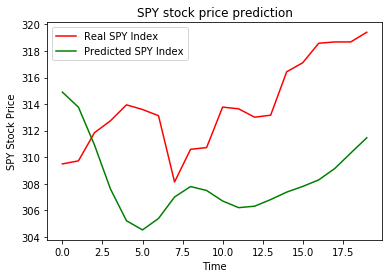

In [48]:
plt.plot(real_stock_price, color = 'red', label = 'Real SPY Index')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted SPY Index')

plt.title('SPY stock price prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()